#위키피디아의 [세종대왕] 텍스트 데이터를 활용하여 워드클라우드 생성하기



##1.자연어 처리를 위한 라이브러리 설치 및 한글 폰트 설치
pip install konlpy : 자연어 처리를 위한 라이브러리 설치


---


*참고:pip install konlpy를 실행할때 오류가 생기는 경우
*  코드셀에 해당 명령어 외에 주석이 있을경우(주석삭제)
*  프로그램 중간쯤에서 실행하는 경우(항상 제일 처음에 실행)






In [ ]:
pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 69.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 495.9/495.9 kB 27.5 MB/s eta 0:00:00


In [ ]:
#한글을 지원하기 위한 한글 폰트 설치

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 2 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 2s (4,981 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 117540 files and direc

##2.텍스트 화일과 이미지 화일 불러오기
##### - 세종대왕.txt
##### - maskHeart.jpg


In [ ]:
#화일을 업로드하기 위한 소스 코드
#드라이브 마운트 한후 드래그&드롭으로 파일을 업로드해도 됨

from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##3.필요한 라이브러리들 로딩하기

*  워드 클라우드 생성에 필요한 라이브러리들(wordcloud, STOPWORDS, matplotlib)
*   마스크 이미지 처리를 위해 필요한 라이브러리들(Image, numpy)






In [5]:
# 워드 클라우드 생성에 필요한 라이브러리들(wordcloud, STOPWORDS, matplotlib)

from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

#마스크 이미지 처리를 위해 필요한 라이브러리들(Image, numpy)

from PIL import Image
import numpy as np

##4.관련 화일들 open 하고 저장하기

In [6]:
# 워드 클라우드 생성을 위한 텍스트 화일을 열어 읽어오기
# 파일변수명 = open('화일명', 'r', encoding='UTF8')  : 텍스트 화일 열기
# 텍스트변수명 = 파일변수명.read()        : 텍스트 화일에 있는 데이터 읽어오기

f =open('세종대왕.txt', 'r', encoding='UTF8')
text =f.read()

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
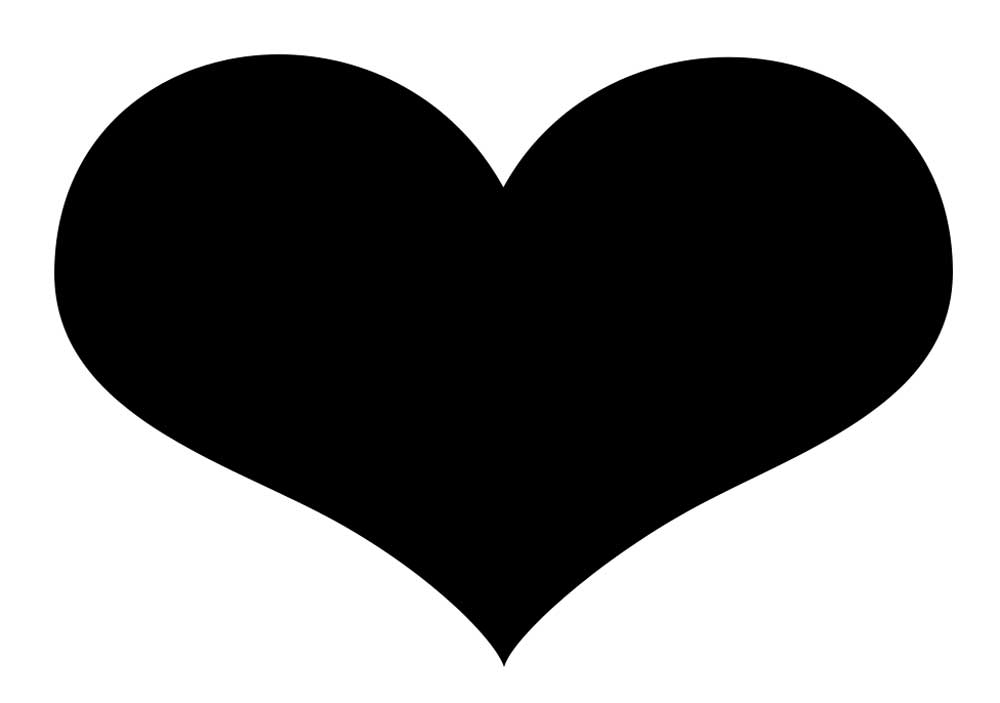

In [8]:
# 마스크 이미지 화일 읽어와서 array로 변경하기
# 마스크변수명 = np.array(Image.open('마스크이미지화일명'))

maskHeart = np.array(Image.open('heart_mask.jpg'))
maskHeart

##5.자연어 처리하기

In [9]:
#한글 자연어처리를 위한 konlpy 라이브러리 로딩하기
#Okt(Twitter)를 이용한 형태소 분석을 위한 라이브러리 선언
from konlpy.tag import Okt

#Okt 라이브러리를 사용하기 위한 객체 생성
#변수명 = Okt()
t =Okt()

#문자열에서 명사만 추출하기
#변수명.nouns(문자열)
명사 =t.nouns(text)
명사

['세종',
 '여기',
 '연결',
 '다른',
 '뜻',
 '대해',
 '세종',
 '동음',
 '이의',
 '문서',
 '참고',
 '세종',
 '광화문',
 '광장',
 '세종대왕',
 '동상',
 '광화문',
 '광장',
 '세종대왕',
 '동상',
 '지위',
 '조선',
 '왕세자',
 '재위',
 '양력',
 '전임',
 '왕세자',
 '제',
 '양녕대군',
 '후임',
 '왕세자',
 '향',
 '문종',
 '조선',
 '제',
 '국왕',
 '재위',
 '양력',
 '즉위',
 '경복궁',
 '근정전',
 '전임',
 '태종',
 '후임',
 '문종',
 '이름',
 '휘',
 '이도',
 '묘호',
 '세종',
 '군호',
 '충녕대군',
 '시호',
 '장',
 '무인',
 '명효대왕',
 '능호',
 '영릉',
 '경기도',
 '여주시',
 '능서면',
 '왕',
 '대리',
 '신상',
 '정보',
 '출생일',
 '양력',
 '출생지',
 '조선',
 '한성부',
 '준수',
 '방',
 '사망일',
 '세',
 '양력',
 '사망',
 '조선',
 '한성부',
 '영응대군',
 '저',
 '부친',
 '태종',
 '모친',
 '원경왕후',
 '민씨',
 '배우자',
 '소헌왕후',
 '심씨',
 '자녀',
 '남',
 '녀',
 '남',
 '녀',
 '세종',
 '은',
 '조선',
 '제',
 '국왕',
 '재위',
 '세종',
 '업적',
 '대한',
 '존경',
 '의미',
 '세종대왕',
 '컬',
 '목차',
 '개요',
 '생애',
 '왕자',
 '시절',
 '탄생',
 '봉작',
 '양녕대군',
 '갈등',
 '세자',
 '책봉',
 '즉위',
 '대외',
 '정책',
 '공녀',
 '금은',
 '조공',
 '중지',
 '대마도',
 '정벌',
 '군',
 '진',
 '개척',
 '훈민정음',
 '창제',
 '재상',
 '등용',
 '국정',
 '분담',
 '의정부',
 '사제',
 '실시',
 '과학',
 '발전',

In [10]:
#워드클라우드에서 사용한 명사들을 문자열로 변환하기
strData = ''
for t in 명사:
  strData += t + ' '

strData

'세종 여기 연결 다른 뜻 대해 세종 동음 이의 문서 참고 세종 광화문 광장 세종대왕 동상 광화문 광장 세종대왕 동상 지위 조선 왕세자 재위 양력 전임 왕세자 제 양녕대군 후임 왕세자 향 문종 조선 제 국왕 재위 양력 즉위 경복궁 근정전 전임 태종 후임 문종 이름 휘 이도 묘호 세종 군호 충녕대군 시호 장 무인 명효대왕 능호 영릉 경기도 여주시 능서면 왕 대리 신상 정보 출생일 양력 출생지 조선 한성부 준수 방 사망일 세 양력 사망 조선 한성부 영응대군 저 부친 태종 모친 원경왕후 민씨 배우자 소헌왕후 심씨 자녀 남 녀 남 녀 세종 은 조선 제 국왕 재위 세종 업적 대한 존경 의미 세종대왕 컬 목차 개요 생애 왕자 시절 탄생 봉작 양녕대군 갈등 세자 책봉 즉위 대외 정책 공녀 금은 조공 중지 대마도 정벌 군 진 개척 훈민정음 창제 재상 등용 국정 분담 의정부 사제 실시 과학 발전 천문 역법 금속활자 인쇄 술 도량형 통일 총통 제작 문물 발전 음악 정비 편경 제작 서적 편찬 문물 정비 법전 정비 형옥 제도 확립 공법 제정 애민 정책 불교 귀의 건강 악화 최후 묘호 시호 능묘 기타 일화 중첩 혼인 관계 가족 관계 세종 직계 조상 부모 왕비 후궁 왕자 왕녀 세종 등장 작품 드라마 영화 게임 세종 유래 것 건축물 지역 도로명 단체 상 구축함 화폐 도안 기념일 소행성 프로젝트 보기 참고 문헌 외부 링크 각주 주해 개요 조선 제 국왕 태종 원경왕후 아들 형 양녕대군 폐 세자 세자 책봉 태종 양위 즉위 세종 과학 기술 예술 문화 국방 등 분야 업적 백성 농사 관 책 글 이해 모습 보고 누구 수 효율 과학 문자 체계 훈민정음 창제 훈민정음 언문 불리 왕실 민간 사용 세기 주시경 한글 발전 오늘날 대한민국 공식 문자 로서 널리 과학 기술 두루 관심 혼 앙부일구 자격루 측우기 등 발명 폭 지원 신분 장영실 최해산 등 학자 후원 국방 이종무 파견 왜구 토벌 대마도 정벌 이징옥 최윤덕 김종서 등 북방 평안도 함길도 출몰 여진족 국경 밖 군 진 개척 압록강 두만강 유역 국경 확장 백

##6.워드 클라우드 생성하기

In [11]:
#한글 폰트 경로 저장하기
path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'

#불용어로 처리한 단어들 추가하기
#변수명 = STOPWORDS.union({'단어들'})
s_words =STOPWORDS.union({'대한','어떤','같은','것','이','등','의','또한','그','때','를'})
s_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

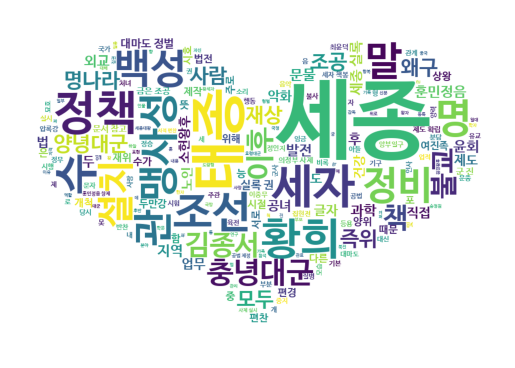

In [13]:
#워드클라우드의 속성 지정하기
#변수명 = WordCloud(width= 정수, height= 정수,
#                   stopwords= 불용어변수명,
# 			            font_path = 폰트경로,
#			              mask = 마스크변수명,
#				            background_color= '배경색',
#                   max_words=출력할최대단어수)
#
wordcloud =WordCloud(width= 1530, height= 1000,
                    stopwords= s_words,
 			              font_path = path,
			              mask = maskHeart,
				            background_color= 'white')

#텍스트 데이터를 활용하여 워드클라우드 생성하기
#변수명.generate(텍스트변수명)
wordcloud.generate(strData)

#워드클라우드 이미지 출력하기
#plt.imshow(변수명)
plt.imshow(wordcloud)

#x, y축 눈금 숨기기
plt.axis('off')

plt.show()

#공공데이터의 빈도수를 활용하여 워드클라우드 생성하기
2022년 국내 백미(92.9%) 생산량.csv 자료를 활용하여 2022년 생산량이 가장 많은 지역을 워드클라우드로 표현해보자.
*  URL: https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1ET0221&conn_path=I2
*  출처:통계청,「농작물생산조사」, 2022, 2023.09.01, 미곡생산량(백미,92.9%)



##1.데이터 및 파일 준비하기

In [14]:
#excel 화일 읽어오기
#변수명 = pd.read_csv(화일명, encoding=‘인코딩방식’, skiprows=[행번호])

import pandas as pd

data =pd.read_csv('2022년 미곡생산량(백미_92.9).csv', encoding="EUC-KR", skiprows=[0,2])
data

,시도별,합계:면적 (ha),합계:생산량 (톤),논벼:면적 (ha),논벼:10a당 생산량 (kg),논벼:생산량 (톤),밭벼:면적 (ha),밭벼:10a당 생산량 (kg),밭벼:생산량 (톤)
0,서울특별시,173,864,173,498,864,0,0,0
1,부산광역시,2123,10801,2123,509,10801,0,0,0
2,대구광역시,2935,15512,2935,529,15512,0,0,0
3,인천광역시,11331,56176,11331,496,56176,0,0,0
4,광주광역시,5066,24901,5066,492,24901,0,0,0
5,대전광역시,1132,5825,1132,514,5825,0,0,0
6,울산광역시,3710,17772,3710,479,17772,0,0,0
7,세종특별자치시,3294,17443,3294,530,17443,0,0,0
8,경기도,73648,366863,73645,498,366857,3,230,6
9,강원도,28708,143908,28708,501,143908,0,0,0


In [15]:
#csv 행열 정보 확인하기
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   시도별               17 non-null     object
 1   합계:면적 (ha)        17 non-null     int64 
 2   합계:생산량 (톤)        17 non-null     int64 
 3   논벼:면적 (ha)        17 non-null     int64 
 4   논벼:10a당 생산량 (kg)  17 non-null     int64 
 5   논벼:생산량 (톤)        17 non-null     int64 
 6   밭벼:면적 (ha)        17 non-null     int64 
 7   밭벼:10a당 생산량 (kg)  17 non-null     int64 
 8   밭벼:생산량 (톤)        17 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 1.3+ KB


##2.정형 데이터를 open 하고 딕셔너리 자료구조로 변환하기

In [16]:
#정형 데이터를 딕셔너리 자료구조로 변환하기
#dict = {key1 : value1, key2 : value2 , ... }

dicData = {}

for key, value in zip(data['시도별'],data['합계:생산량 (톤)']):
  dicData[key]=value



dicData

{'서울특별시': 864,
 '부산광역시': 10801,
 '대구광역시': 15512,
 '인천광역시': 56176,
 '광주광역시': 24901,
 '대전광역시': 5825,
 '울산광역시': 17772,
 '세종특별자치시': 17443,
 '경기도': 366863,
 '강원도': 143908,
 '충청북도': 171414,
 '충청남도': 725273,
 '전라북도': 621838,
 '전라남도': 742913,
 '경상북도': 511392,
 '경상남도': 330604,
 '제주도': 201}

##3.워드 클라우드 생성하기

In [17]:
#한글 경로를 변수에 저장하고 마스크 이미지 읽어오기
# 마스크변수명 = np.array(Image.open('마스크이미지화일명'))

import numpy as np

maskHeart = np.array(Image.open('heart_mask.jpg'))

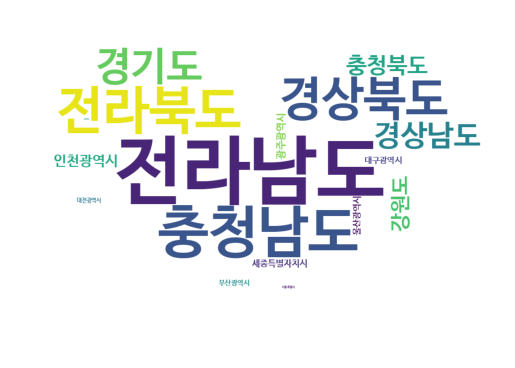

In [20]:
#딕셔너리 데이터를 활용하여 워드클라우드 생성하기
#변수명 = WordCloud().generate_from_frequencies(dictionary구조)

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf'
#워드클라우드 속성 지정하기
wordcloud = WordCloud(width= 1500, height= 1000,
                      stopwords= s_words,
			                mask = maskHeart,
		                  background_color= 'white',
                      font_path=path)


#딕셔너리 데이터를 활용하여 워드클라우드 생성하기
wordcloud.generate_from_frequencies(dicData)


#워드클라우드 이미지 보여주기
#plt.imshow(변수명)
plt.imshow(wordcloud)

#x, y축 눈금 숨기기
plt.axis('off')


plt.show()